**Task:** Perform a Kmeans clustering for the given Dataset
    
**Dataset:** Breast cancer Dataset (From the Sklearn Library)

**Date:** 20|10|22

In [27]:
#Importing the required the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [28]:
#importing the dataset
#We use the Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
data= pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [29]:
data.head() #Observing 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
data.describe()# Looking basic statistics for all the columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [31]:
#Checking for the missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

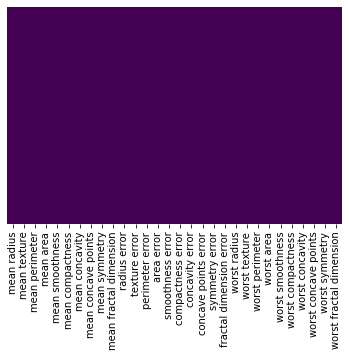

In [32]:
#Visualizing the same
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False,yticklabels = False )

**Conclusion:** There are no missing values in the data

**Exploratory Data Analysis**

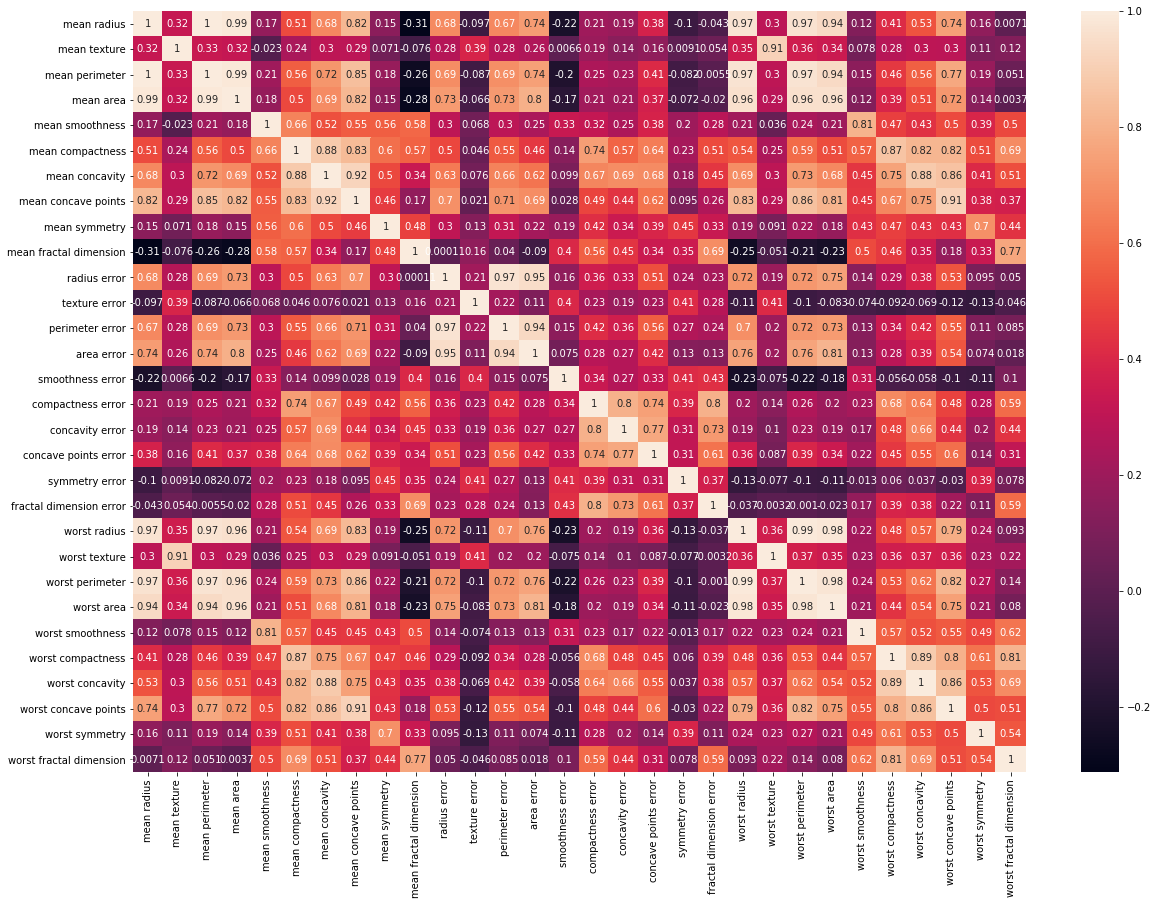

In [33]:
plt.figure(figsize = (20,14))
sns.heatmap(data.corr(),annot = True)

**Data Wrangling**

In [71]:
#Scaling the data as Kmeans is sensitive to the Unit of the variables
scaled = StandardScaler() #Creating an object

In [72]:
scaled.fit(data) #Fiting the data for scaling

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
scaled_data = scaled.transform(data) #Transforming the data

In [74]:
scaled_data = pd.DataFrame(scaled_data, columns = breast_cancer.feature_names) #Converting the array to Data Frame

In [75]:
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [76]:
#Performing Dimentionality reduction using PCA
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
variance = pca.explained_variance_ratio_ #This step gives the eigen values
proportional_variance = variance/sum(variance) #Finding proportional variance
proportional_variance*100

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

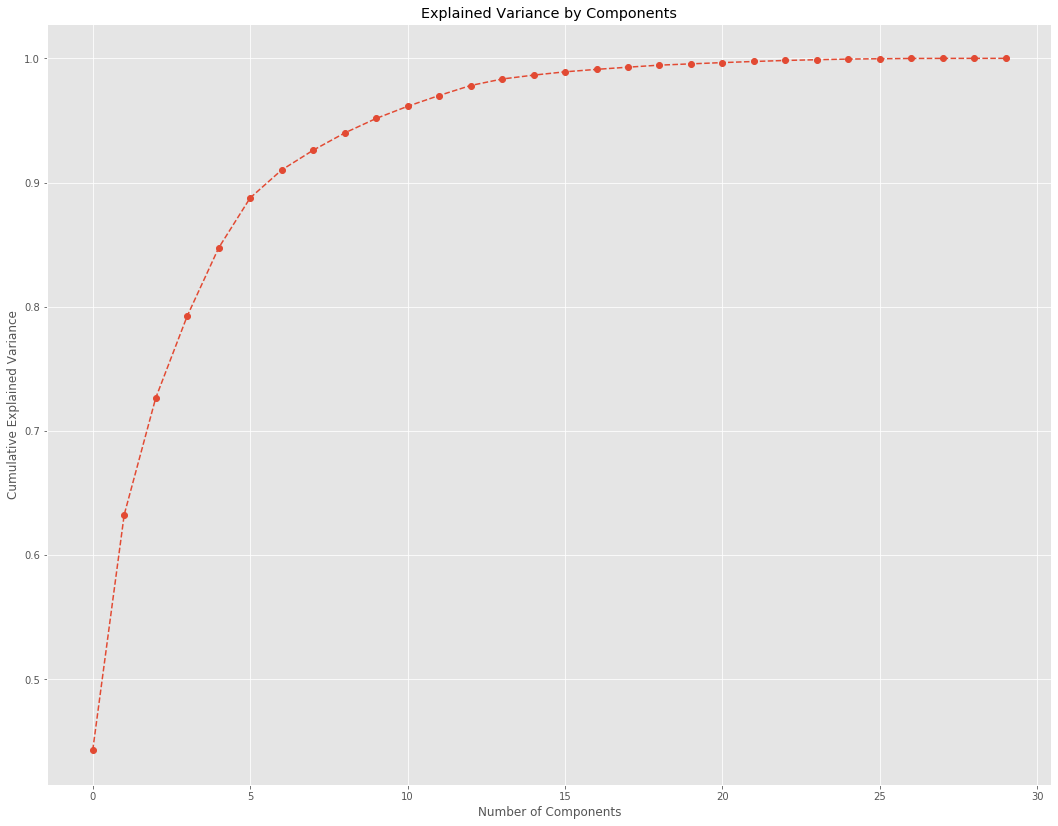

In [97]:
#Graphically representing the Cumulative variance
plt.figure(figsize = (18,14))
plt.plot(range(len(variance)),variance.cumsum(),marker = 'o',ls = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**Conclusion:** Six seems to be the optimum number of PCs. This captures more than 86% of variations.

In [79]:
pca = PCA(n_components = 6) #Using only six PCs

In [80]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
scaled_data = pca.transform(scaled_data) 

In [82]:
scaled_data = pd.DataFrame(scaled_data,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [83]:
scaled_data.head() #The new data frame with six PCs

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028657
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


**Using the K Means cluster algorithm**


**Method 1:** Using Silhouette coefficient

In [84]:
#To select the best cluster we use the silhouette coefficient
silhouette_Coefficient= {}
silhouette_Coeff_list = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    silhouette_Coefficient[i] = round(silhouette_score(scaled_data, kmeans.labels_, metric='euclidean'),5)
    silhouette_Coeff_list.append(round(silhouette_score(scaled_data, kmeans.labels_, metric='euclidean'),5))
silhouette_Coefficient 

{2: 0.37771,
 3: 0.34731,
 4: 0.31613,
 5: 0.19293,
 6: 0.20081,
 7: 0.1911,
 8: 0.18488,
 9: 0.18524,
 10: 0.18466}

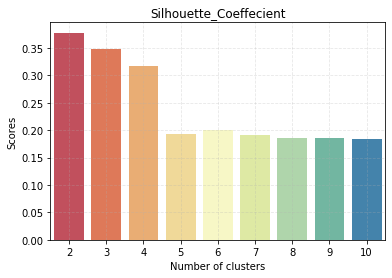

In [85]:
cluster = [*range(2,11)]
sns.barplot(cluster, silhouette_Coeff_list,palette= 'Spectral')
plt.title('Silhouette_Coeffecient')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.grid(alpha = 0.3,ls = 'dashed')
plt.show()

**Conclusion:** According to the silhouette coefficient two clusters is optimum.

**Method 2:** Using Within Sum of Square to select optimum clusters

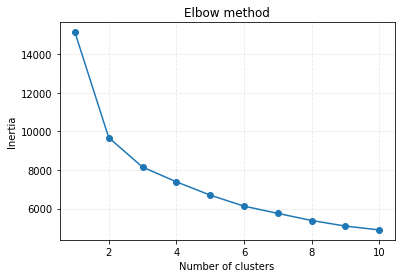

In [86]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(alpha = 0.3,ls = 'dashed')
plt.show()

**Conclusion:** Here, it seems selceting either two or three clusters seems optimum. 

But finally since the silhouette coefficient also indicate two cluster being optimum, two is selected to be the our number of clusters.

In [87]:
kmeans = KMeans(n_clusters=2) #Using Kmeans with two clusters
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
pred = pd.DataFrame(kmeans.predict(scaled_data),columns = ['Cluster']) #Predicting the clusters for each observations

In [89]:
final_data = pd.concat([data,pred],axis = 1) #Concatenating the dataset with the predicted clusters
final_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [90]:
final_data['Cluster'].value_counts()

0    380
1    189
Name: Cluster, dtype: int64

**Conclusion:** There are 380 observations which are allocated to cluster 0 and 189 observations which are allocated to cluster 1. 

In [91]:
print('The metrics are:')
print("The Silhouette Score for two cluster is:",round(silhouette_score(scaled_data, kmeans.labels_, metric='euclidean'),5))
print("The Within Sum of Square is:            ",round(kmeans.inertia_,5))

The metrics are:
The Silhouette Score for two cluster is: 0.37771
The Within Sum of Square is:             9678.77281


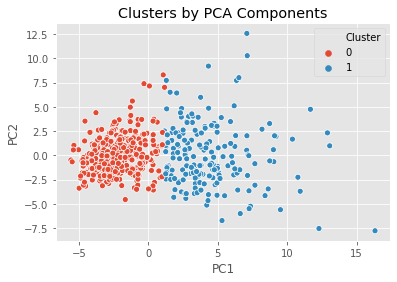

In [96]:
#Now visualizing the clusters using two PCs
x_axis = scaled_data['PC1']
y_axis = scaled_data['PC2']
sns.scatterplot(x_axis,y_axis,hue = final_data['Cluster'])
plt.title('Clusters by PCA Components')
plt.show()

**Interpretation:** Since the two PCs alone explains more than 63% of variations, graphically representing is justifiable.